## Exercise 6 - Solution

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,6]

### Read date column in sales data as date

In [4]:
# Read a CSV file into a Pandas DataFrame and set Date to datetime64
PATH='data/rossmann'
store_df = pd.read_csv(f'{PATH}/store.csv')
sales_df = pd.read_csv(f'{PATH}/sales.csv', dtype={'StateHoliday':np.object}, parse_dates=['Date'])
sales_df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [3]:
# convert column in existing dataframe
sales_df2 = pd.read_csv(f'{PATH}/sales.csv', dtype={'StateHoliday':np.object})
sales_df2.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [4]:
sales_df2['Date'] = pd.to_datetime(sales_df2['Date'] )
sales_df2.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [12]:
sales_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


### Calculate CompetitionOpenSince date from month and year columns (datetime64)

In [5]:
# Calculate CompetitionOpenSince date from month and year columns
store_df['CompetitionOpenSince'] = pd.to_datetime(dict(year=store_df.CompetitionOpenSinceYear, month=store_df.CompetitionOpenSinceMonth, day=1))

#### A more complicated way

In [16]:
# set default values for empty fields
store_df.CompetitionOpenSinceYear.fillna(2018, inplace=True)
store_df.CompetitionOpenSinceMonth.fillna(8, inplace=True)
# get years and months as list
years = store_df.CompetitionOpenSinceYear.values 
months = store_df.CompetitionOpenSinceMonth.values
## make a list of (year, month) tuples
tuples = zip(years, months)
# iterate over all tuples and convert each tuple to a string ($year-$month-01)
dates = [( str(int(tuple[0])) + "-" + str(int(tuple[1])) + "-01" ) for tuple in tuples]
dates[0:3]

['2008-9-01', '2007-11-01', '2006-12-01']

In [19]:
## add new column to store_df (be careful to keep correct order of dates)
store_df['CompetitionOpenSince'] = pd.Series(dates)
# convert column values to pandas datetime format
store_df['CompetitionOpenSince']= pd.to_datetime(store_df['CompetitionOpenSince'])
store_df['CompetitionOpenSince'].head(5)

0   2008-09-01
1   2007-11-01
2   2006-12-01
3   2009-09-01
4   2015-04-01
Name: CompetitionOpenSince, dtype: datetime64[ns]

### Fill missing CompetitionDistance with average value of all distances

In [6]:
# Fill missing CompetitionDistance values with average value of all distances
mean = store_df.CompetitionDistance.mean()
store_df.CompetitionDistance.fillna(mean, inplace=True)

### Fill missing Competition date with today's date

In [7]:
# Fill missing CompetitionOpenSince values with today's date
store_df.CompetitionOpenSince.fillna(pd.datetime.today(), inplace=True)

### Replace StateHoliday categories a, b, c with 1 and convert to int32

In [9]:
# Replace StateHoliday categories a, b, c with 1 and convert to int32
sales_df['StateHolidayInt'] = sales_df.StateHoliday.replace(['a','b','c'], 1).astype(np.int32)
#sales_df['StateHolidayInt'] = sales_df['StateHolidayInt'].astype(np.int32)
sales_df['StateHolidayInt'].dtype

dtype('int32')

### Join store type, assortment, distance and open since from store df to sales df

In [27]:
# Join store type, assortment, distance and open since from store df to sales df
merged_df = pd.merge(left=sales_df, right=store_df[['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSince']], on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,2008-09-01
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,2008-09-01
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,2008-09-01
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,2008-09-01
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,2008-09-01
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,2008-09-01
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,2008-09-01
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,2008-09-01
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,2008-09-01
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,2008-09-01


### Plot average sales and number of customers per store type

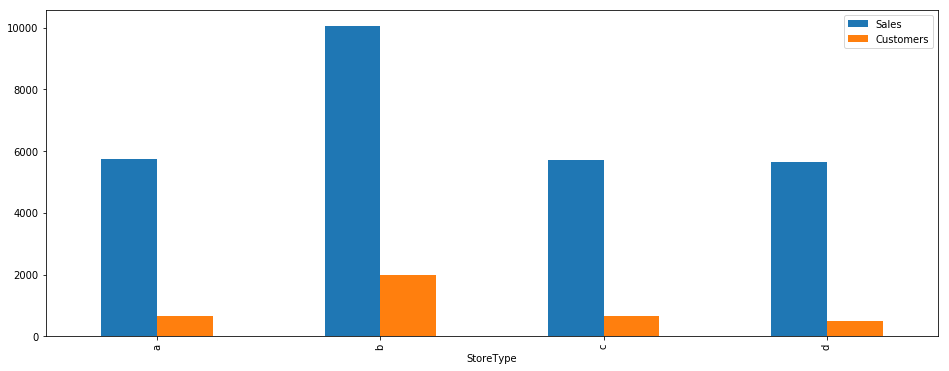

In [29]:
# Average sales and number of customers per store type
merged_df.groupby(['StoreType'])[['Sales', 'Customers']].mean().plot.bar();

In [30]:
# Test: Categorize store type and assortment
merged_df['StoreTypeCat'] = merged_df.StoreType.astype('category').cat.codes
merged_df['AssortmentCat'] = merged_df.Assortment.astype('category').cat.codes

### Bonus task

In [104]:
# Find correlations
merged_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHolidayInt,CompetitionDistance,StoreTypeCat,AssortmentCat
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,0.000542,-0.026394,-0.021604,0.004419
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.052889,-0.000025,0.000051,-0.000052
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.254216,-0.019207,-0.013057,0.074941
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.226608,-0.102777,-0.141423,0.007044
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,-0.378378,0.007981,-0.003325,0.002972
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,-0.012353,0.000138,-0.000299,0.000294
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,0.148651,-0.003684,0.000032,-0.002530
StateHolidayInt,0.000542,-0.052889,-0.254216,-0.226608,-0.378378,-0.012353,0.148651,1.000000,-0.000784,0.002533,-0.002755
CompetitionDistance,-0.026394,-0.000025,-0.019207,-0.102777,0.007981,0.000138,-0.003684,-0.000784,1.000000,0.078070,0.146382
StoreTypeCat,-0.021604,0.000051,-0.013057,-0.141423,-0.003325,-0.000299,0.000032,0.002533,0.078070,1.000000,0.232862


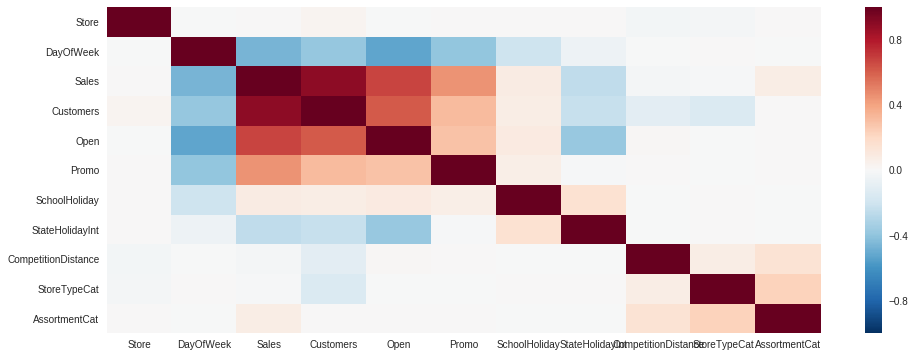

In [105]:
# Plot a correlation heatmap
sns.heatmap(merged_df.corr());